# Is Python Fast or Slow?

Assignment 1

ICOM5015-001D Group B

Christian G Rodriguez Berrios, Justin Rivera, Orlando Saladaña

## What is the purpose of the assignment?

The goal of this assignment is to experiment with the different approaches to calculate the product of vectors and matrices and compare the speed at which the results are reached. 
Also as this is the first coding assignment it serves as an introduction to the structure of coding and reports for the class.

## What is the key question of this assignment?

The goal of this assignment is to experiment with the different approaches (sequential vs. parallel) to calculate the product of vectors and matrices and compare the speed at which the results are reached.

## What are the key concepts taken into consideration for the design of the experiment?

In order to make a fair comparison between both approaches of calculating the product of matrices of different sizes, we first need to create the data set to be used for the experiment. The data set was created to take a sample of different sizes of matrices and the numbers contained inside of the matrices are randomly selected at runtime. This eliminates any human bias which could be introduced by manually selecting these values. This data set also needs to ensure that the matrices are compatible for the operation, this is ensured by having one of two dimensions of a 2 dimensional matrix set to match. The same tool was used for timing all tests to keep consistency.


## How did you set up the experiment (dimensions in 1-D and 2-D arrays)? 

The set up of the experiment was initialized, declaring a few collections that contain arrays in one and two dimensions with randomized values from a range of smaller than 10, greater than 10 but smaller than 100 and greater than 100. Afterwards, a function was created to solve the dot product of two arrays. This function manages the iteration between the collection of arrays and their rows and columns while calculating their product. Additionally, we imported a library called timeit to effectively determine the average time 

## Experimental Procedure: 

First we create several 1D and 2D Arrays of varying sizes utilizing NumPy.
Time is imported to help us determine the time it takes to calculate their Dot Products

In [1]:
import numpy as np
import timeit
#1D Arrays:
    #Dimensionality smaller than 10
_1DSmallerThan10 = [np.random.randint(20, size=(1,4)), 
                        np.random.randint(20, size=(1,6)), 
                        np.random.randint(20, size=(1,7)), 
                        np.random.randint(20, size=(1,8))]
_1DS10 = [np.random.randint(20, size=(4,1)), 
                        np.random.randint(20, size=(6,1)), 
                        np.random.randint(20, size=(7,1)), 
                        np.random.randint(20, size=(8,1))]

    #Dimensionality larger than 10, smaller than 100

_1DLargerThan10Less100 = [np.random.randint(20, size=(1,36)), 
                            np.random.randint(20, size=(1,42)), 
                            np.random.randint(20, size=(1,56)), 
                            np.random.randint(20, size=(1,80))]
_1DL10 = [np.random.randint(20, size=(36,1)), 
                        np.random.randint(20, size=(42,1)), 
                        np.random.randint(20, size=(56,1)), 
                        np.random.randint(20, size=(80,1))]

    #Dimensionality of several hundreds
_1DSeveralHundreds = [np.random.randint(20, size=(1,405)), 
                        np.random.randint(20, size=(1,642)), 
                        np.random.randint(20, size=(1,761)), 
                        np.random.randint(20, size=(1,896))]
_1DL100 = [np.random.randint(20, size=(405,1)), 
                        np.random.randint(20, size=(642,1)), 
                        np.random.randint(20, size=(761,1)), 
                        np.random.randint(20, size=(896,1))]
#2D Arrays:
    #Dimensionality smaller than 10
_2DSmallerThan10 = [np.random.randint(20, size=(2,4)), 
                        np.random.randint(20, size=(8,6)), 
                        np.random.randint(20, size=(3,9))]
_2DS10 = [np.random.randint(20, size=(4,3)), 
                        np.random.randint(20, size=(6,2)), 
                        np.random.randint(20, size=(9,2))]

    #Dimensionality Larger than 10, smaller than 100
    
_2DLargerThan10Less100 = [np.random.randint(20, size=(12,36)), 
                            np.random.randint(20, size=(21,42)), 
                            np.random.randint(20, size=(32,56))]
_2DL10 = [np.random.randint(20, size=(36,21)), 
                        np.random.randint(20, size=(42,12)), 
                        np.random.randint(20, size=(56,11))]

    #Dimensionality Larger than 100
    
_2DSeveralHundreds = [np.random.randint(20, size=(102,547)), 
                        np.random.randint(20, size=(120,389)), 
                        np.random.randint(20, size=(101,1157))]
_2DL100 = [np.random.randint(20, size=(547,123)), 
                        np.random.randint(20, size=(389,231)), 
                        np.random.randint(20, size=(1157,106))]


## We will utilize this method in order to calculate the dot product of 1D and 2D arrays

In [2]:
def dotProduct(arr1,arr2):
    index=0
    while index < len(arr1):
        
        #Defined Arrays
        array_1 = arr1[index]
        array_2 = arr2[index]
        # print(index)

        #Identifying dimensions
        rows_1 = len(array_1)
        cols_1 = len(array_2[0])
        rows_2 = len(array_1)
        cols_2 = len(array_2[0])
        
        #Calculate the result if each array compatible, ex. (nxm , mxn)
        if(cols_1 == rows_2):

                #Empty Array For Result
                product_result = [[0 for j in range(cols_2)] for i in range(rows_1)]

                #Product Calculation
                for i in range(rows_1):
                    for j in range(cols_2):
                        for k in range(cols_1):
                            product_result[i][j] += array_1[i][k] * array_2[k][j]
        else:

                #Calculate Result Using Transpose 
                if(cols_1 == cols_2):

                    #Calculate transponse
                    transpose_array = np.transpose(array_2)

                    #Identifying transpose dimensions
                    rows_t = len(transpose_array)
                    cols_t = len(transpose_array[0])

                    #Empty Array For Result
                    product_result = [[0 for j in range(cols_t)] for i in range(rows_1)]

                    #Product Calculation
                    for i in range(rows_1):
                      for j in range(cols_t):
                          for k in range(cols_1):
                              product_result[i][j] += array_1[i][k] * transpose_array[k][j]
                else:
                    print("Choose other dimmensional arrays!")
        index+=1

How long does Python take to calculate the dot product of 1D arrays of N size

In [3]:
print("Seeing how long it takes for Dimensionalities smaller than 10")
array1 = _1DSmallerThan10
array2 = _1DS10
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_1DS10)),'seconds to finish\n')
print("Time for Dimensionalities larger than 10")
array1 = _1DLargerThan10Less100
array2 = _1DL10
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_1DL10)),'seconds to finish\n')
print("Time for Dimensionalities larger than 100")
array1 = _1DSeveralHundreds
array2 = _1DL100
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_1DL100)),'seconds to finish\n')

Seeing how long it takes for Dimensionalities smaller than 10
On average it takes  3.737500000000615e-05 seconds to finish

Time for Dimensionalities larger than 10
On average it takes  2.9124999999963208e-05 seconds to finish

Time for Dimensionalities larger than 100
On average it takes  2.5825000000034848e-05 seconds to finish



How long does Python take to calculate the dot product of 2D arrays of NxM size

In [4]:
print("Seeing how long it takes for Dimensionalities smaller than 10")
array1 = _2DSmallerThan10
array2 = _2DS10
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_2DS10)),'seconds to finish\n')
print("Time for Dimensionalities larger than 10")
array1 = _2DLargerThan10Less100
array2 = _2DL10
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_2DL10)),'seconds to finish\n')
print("Time for Dimensionalities larger than 100")
array1 = _2DSeveralHundreds
array2 = _2DL100
start = timeit.default_timer()
dotProduct(array1,array2)
print('On average it takes ',((timeit.default_timer()-start)/len(_2DL100)),'seconds to finish\n')

Seeing how long it takes for Dimensionalities smaller than 10
On average it takes  9.786666666666832e-05 seconds to finish

Time for Dimensionalities larger than 10
On average it takes  0.01095650000000011 seconds to finish

Time for Dimensionalities larger than 100
On average it takes  7.8261456 seconds to finish



## How Does Numpy perform on the same arrays?

How long does NumPy take to calculate the dot product of 1D arrays of N size

In [5]:
print("Seeing how long numpy takes for Dimensionalities smaller than 10")
i=0
while i < len(_1DS10):
    total=0
    Start = timeit.default_timer()
    np.dot(_1DSmallerThan10[i],_1DS10[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_1DS10)), ' seconds\n')
print("Time for Dimensionalities larger than 10")
i=0
while i < len(_1DL10):
    total=0
    Start = timeit.default_timer()
    np.dot(_1DLargerThan10Less100[i],_1DL10[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_1DL10)), ' seconds\n')
print("Time for Dimensionalities larger than 100")
i=0
while i < len(_1DL100):
    total=0
    Start = timeit.default_timer()
    np.dot(_1DSeveralHundreds[i],_1DL100[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_1DL100)), ' seconds\n')
    
    
    





Seeing how long numpy takes for Dimensionalities smaller than 10
On average Numpy took  1.3000000000928935e-06  seconds

Time for Dimensionalities larger than 10
On average Numpy took  1.000000000139778e-06  seconds

Time for Dimensionalities larger than 100
On average Numpy took  1.5000000006537562e-06  seconds



How long does NumPy take to calculate the product of a 2D array of NxM size

In [6]:
print("Seeing how long numpy takes for Dimensionalities smaller than 10")
i=0
while i < len(_2DS10):
    total=0
    Start = timeit.default_timer()
    np.dot(_2DSmallerThan10[i],_2DS10[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_2DS10)), ' seconds\n')
print("Time for Dimensionalities larger than 10")
i=0
while i < len(_2DL10):
    total=0
    Start = timeit.default_timer()
    np.dot(_2DLargerThan10Less100[i],_2DL10[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_2DL10)), ' seconds\n')
print("Time for Dimensionalities larger than 100")
i=0
while i < len(_2DL100):
    total=0
    Start = timeit.default_timer()
    np.dot(_2DSeveralHundreds[i],_2DL100[i])
    TakenTime = timeit.default_timer() - Start
    total=+ TakenTime
    i+=1
print('On average Numpy took ',(total/len(_2DL100)), ' seconds\n')

Seeing how long numpy takes for Dimensionalities smaller than 10
On average Numpy took  1.5999999997499497e-06  seconds

Time for Dimensionalities larger than 10
On average Numpy took  5.4333333328789495e-06  seconds

Time for Dimensionalities larger than 100
On average Numpy took  0.002607633333333581  seconds



### After doing this procedure three times, we have obtained the following data on Python and NumPy's performances

For 1 Dimensional Arrays

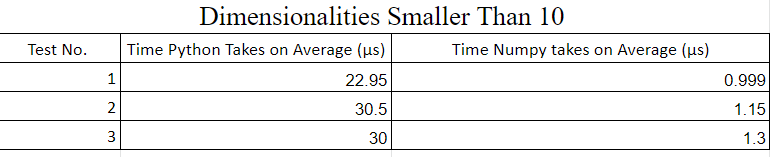 

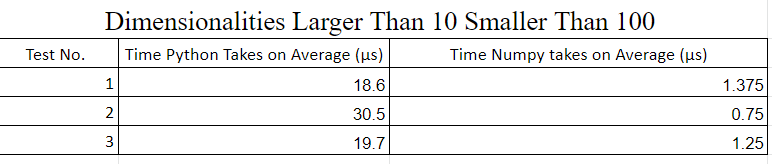

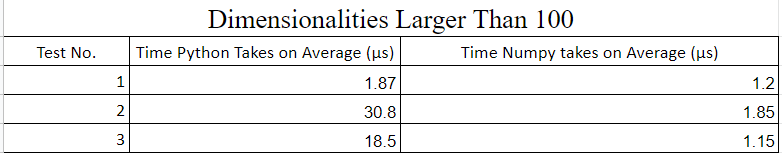

Graphing the data

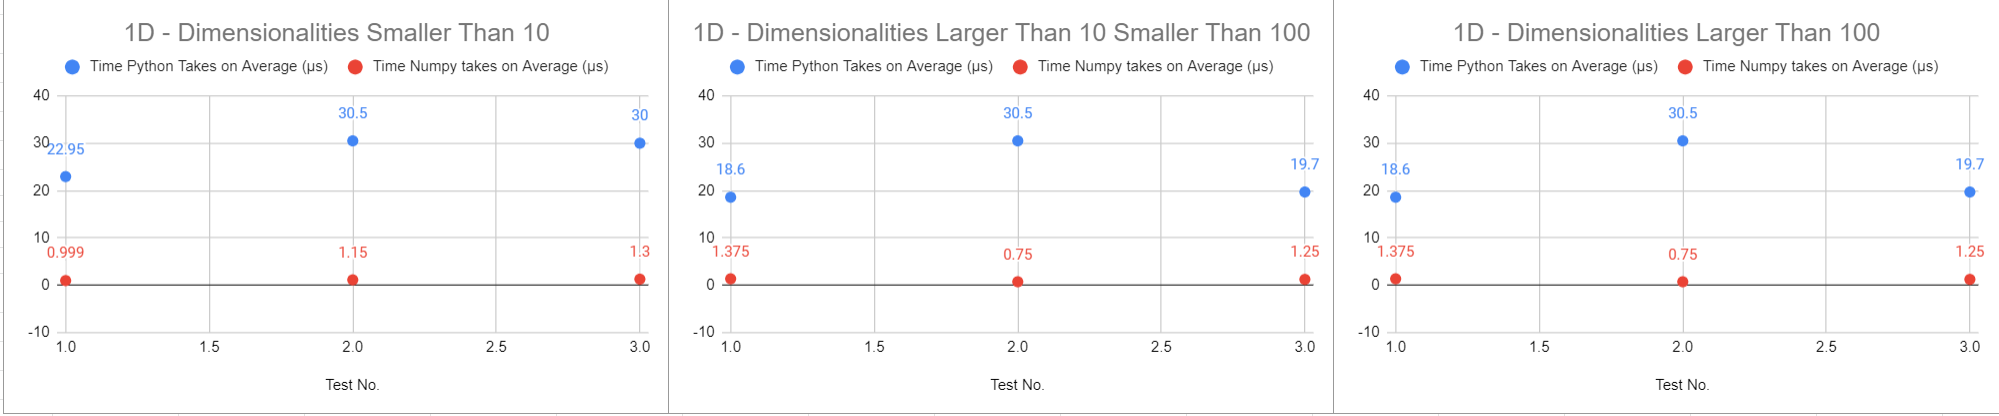

For 2 Dimensional Arrays

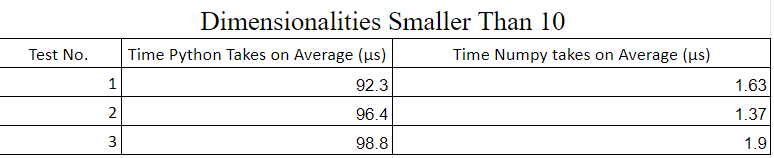

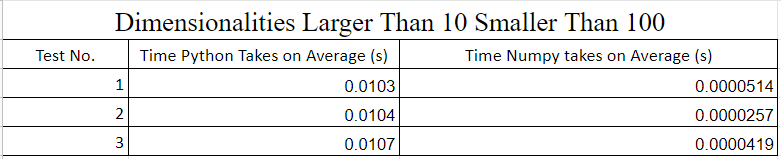

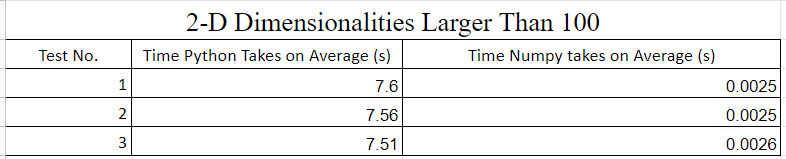

Graphing the data

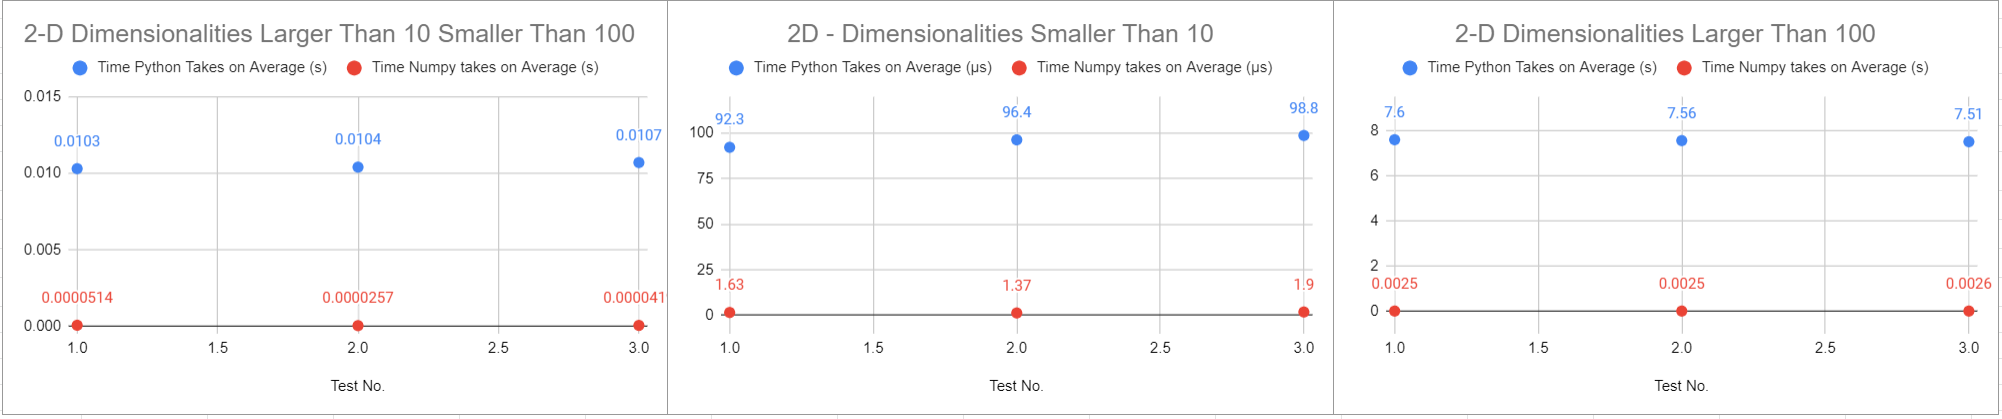

###  How do the concepts identified before, together with authoritative information sources (technical literature on Python and NumPy) guide your analysis and interpretation of the data obtained from your experiments?


Knowing that NumPy utilizes C, C++,  and Fortran, letting it use a different type of array that is static and more dense, allowing it to be faster than Python’s dynamic arrays, which allows different data types to be included in them, means that we can test out their differences in efficiency by testing them with increasing levels of mathematical intensity several times and with their average time.  We can theorize that Python should take much longer to complete its calculations over NumPy. This could be observed visually easier if we graphed the two times together. 


## What do you conclude from this experiment?


Analyzing the time average taken to calculate 1-D and 2-D dimensional arrays utilizing a regular Python function or NumPy proved that NumPy was mayorly faster. Comparing 1-D arrays results from each field proved that NumPy was 10 to 40 times faster than Python and for 2-D arrays Python was 50 to 3000 times slower than NumPy

## What did you learn from this assignment?

In this assignment we learned the importance of utilizing the most appropriate tools for a task, since some tools will be more efficient than others. In this case, utilizing the NumPy library is significantly faster than coding the functionality with Python.

## References:

[1] “What is numpy?,” NVIDIA Data Science Glossary. [Online]. Available: https://www.nvidia.com/en-us/glossary/data-science/numpy/. [Accessed: 18-Feb-2023].

[2] Numpy Developers, “Numpy C code explanations,” NumPy C code explanations - NumPy v1.24 Manual. [Online]. Available: https://numpy.org/doc/stable/dev/internals.code-explanations.html. [Accessed: 18-Feb-2023].

[3] Numpy Developers, “Building from source,” Building from source - NumPy v1.24 Manual. [Online]. Available: https://numpy.org/doc/stable/user/building.html. [Accessed: 18-Feb-2023].